In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import seaborn as sns
import numpy as np  # linear algebra
import pandas as pd

# for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image


In [2]:
#import tweets data
tweets = pd.read_csv("data/cleaned_tweets.csv")
print(tweets.head())

                                                text  label
0  kickers on my watchlist @stock tit @stock @sto...      1
1  @user @stock movie @number return for the @sto...      1
2  @user i d be afraid to short @stock they are l...      1
3                        @stock over @number @number      1
4                        @stock over @number @number      1


In [3]:
#cleaning the dataset

import re
 
def remove_links(Text):
    Text = re.sub('http[^\s]+','',Text)
    digitspattern = r'[0-9]'
    #replace all digits in the string with empty string
    Text = re.sub(digitspattern, '', Text)
    return Text
tweets['text'] = tweets['text'].apply(remove_links)

print(tweets.head())

                                                text  label
0  kickers on my watchlist @stock tit @stock @sto...      1
1  @user @stock movie @number return for the @sto...      1
2  @user i d be afraid to short @stock they are l...      1
3                        @stock over @number @number      1
4                        @stock over @number @number      1


In [4]:
Sentiment = tweets.iloc[:, 1]
Text = tweets.iloc[:, 0]

print(Sentiment.tail())
print(Text.tail())

5786   -1
5787   -1
5788    1
5789    1
5790    1
Name: label, dtype: int64
5786    industry body @stock said discoms are likely t...
5787    gold prices slip below rs @number @number as i...
5788    workers at bajaj auto have agreed to a @number...
5789    sharemarket @stock sensex off day s high up @n...
5790    sensex nifty climb off day s highs still up @n...
Name: text, dtype: object


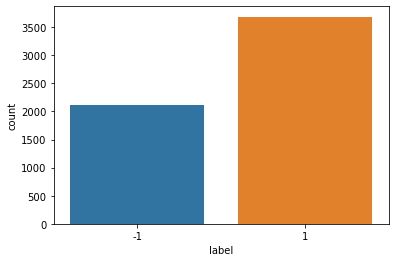

In [5]:
import seaborn as sns
sns.countplot(data=tweets,x=tweets['label'])
plt.savefig('cleaned_tweets_countplot.pdf')

In [6]:
#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
#most frequent words

from nltk.corpus import stopwords
# nltk.download('stopwords')
stop = set(stopwords.words("english"))

corpus = [word for i in tweets["text"].str.split().values.tolist()
         for word in i if (word not in stop)]
# print(corpus)

In [7]:
#to get the most common words from corpus
from nltk.probability import FreqDist
most_common = FreqDist(corpus).most_common(50)
print(most_common)

[('@stock', 8452), ('@number', 6621), ('@user', 779), ('http', 696), ('short', 457), ('today', 343), ('day', 313), ('volume', 306), ('like', 278), ('long', 268), ('stock', 228), ('good', 226), ('new', 209), ('watch', 207), ('stop', 202), ('still', 199), ('nice', 194), ('back', 187), ('buy', 186), ('next', 182), ('move', 180), ('market', 179), ('coronavirus', 179), ('higher', 176), ('time', 174), ('see', 161), ('week', 158), ('one', 157), ('sensex', 151), ('triangle', 148), ('trade', 144), ('close', 143), ('nifty', 141), ('stocks', 140), ('weekly', 137), ('could', 134), ('break', 133), ('looking', 131), ('breakout', 129), ('support', 125), ('ong', 124), ('big', 122), ('going', 120), ('bullish', 119), ('go', 118), ('last', 117), ('looks', 115), ('target', 114), ('green', 113), ('points', 113)]


In [8]:
df = pd.DataFrame(tweets)
print(df.groupby('label').count())

       text
label      
-1     2106
 1     3685


In [9]:
#WORDCLOUD
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

Creating word clouds...


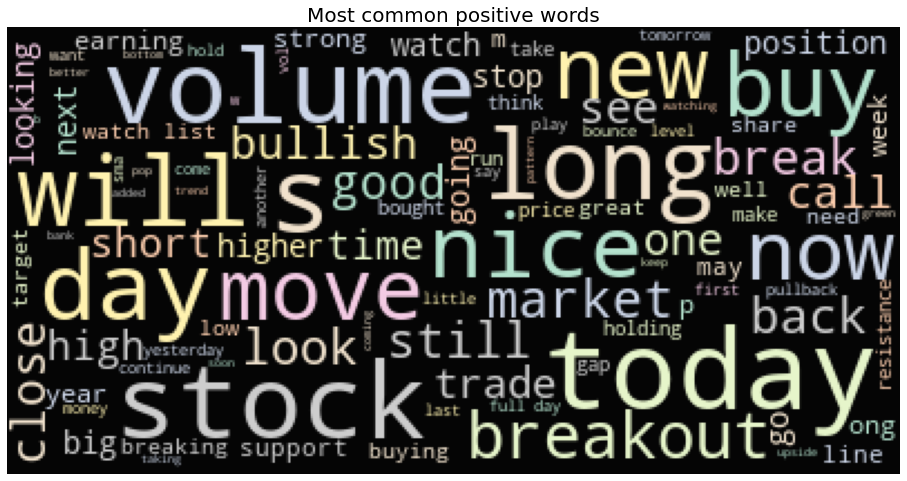

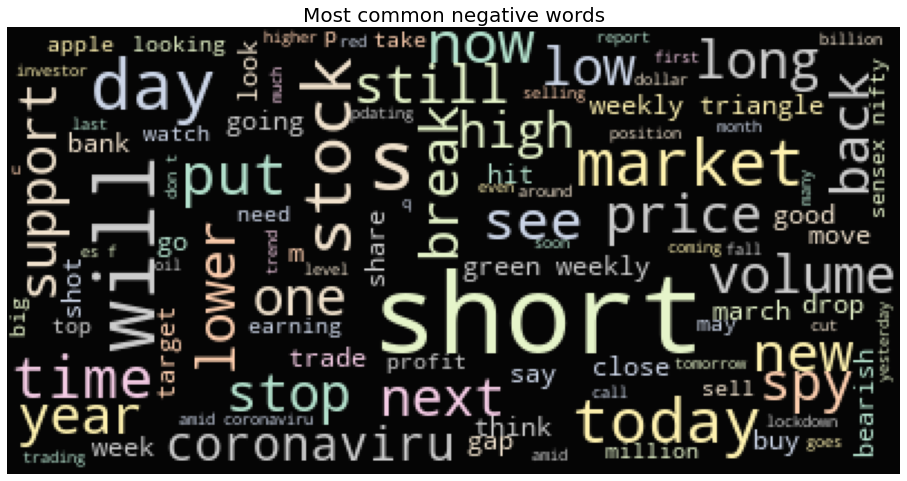

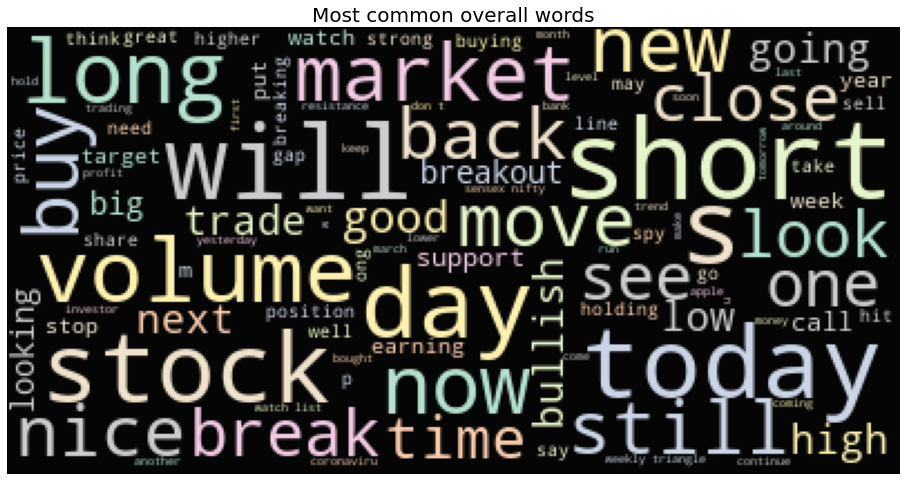

In [10]:
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
%matplotlib inline

def cleannumstock(text):
    text = re.sub('@stock','',text)
    text = re.sub('@number',"",text)
    text = re.sub("@user","",text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text

def generate_wordcloud(words,sentiment):
    plt.figure(figsize=(16,13))
    wc = WordCloud(background_color="black", max_words=100, max_font_size=50)
    wc.generate(words)
    plt.title("Most common {} words".format(sentiment), fontsize=20)
    plt.imshow(wc.recolor(colormap='Pastel2', random_state=17), alpha=0.98)
    plt.axis('off')

df['text'] = df['text'].apply(cleannumstock)    
print("Creating word clouds...")
positive_words=" ".join(df[df.label==1]['text'].values)
negative_words=" ".join(df[df.label==-1]['text'].values)
overall_words=" ".join(df['text'].values)

generate_wordcloud(positive_words,"positive")
plt.savefig('pos_wordcloud.pdf')
generate_wordcloud(negative_words,"negative")
plt.savefig('neg_wordcloud.pdf')
generate_wordcloud(overall_words,"overall")
plt.savefig('overall_wordcloud.pdf')